In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
train=pd.read_csv('/Users/shivamsourav/Desktop/train.csv')
train.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [4]:
test=pd.read_csv('/Users/shivamsourav/Desktop/test.csv')
test.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban


In [5]:
train.shape

(614, 13)

In [6]:
test.shape

(367, 12)

In [7]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
train.groupby('Loan_Amount_Term')['Loan_Amount_Term'].agg('count')

Loan_Amount_Term
12.0       1
36.0       2
60.0       2
84.0       4
120.0      3
180.0     44
240.0      4
300.0     13
360.0    512
480.0     15
Name: Loan_Amount_Term, dtype: int64

In [9]:
test.drop('Loan_ID',axis=1,inplace=True)
train.drop('Loan_ID',axis=1,inplace=True)

In [10]:
train.shape

(614, 12)

In [11]:
test.shape

(367, 11)

In [12]:
train.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
arr=['Credit_History','Self_Employed','LoanAmount','Dependents','Loan_Amount_Term',"Gender","Married"]
for col in arr:
    train[col]=train[col].fillna(train[col].dropna().mode().values[0])

In [14]:
train.isnull().sum().sort_values(ascending=False)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Loan_Status
N    192
Y    422
Name: Loan_Status, dtype: int64


<AxesSubplot:xlabel='Loan_Status', ylabel='Count'>

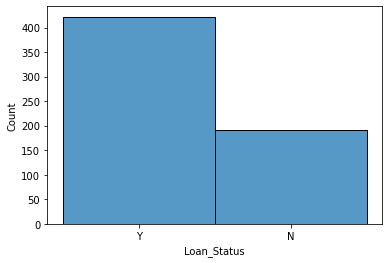

In [15]:
print(train.groupby('Loan_Status')['Loan_Status'].agg('count'))
sns.histplot(train['Loan_Status'])

In [16]:
def fun(x):
    d={'Male': 1, 'Female': 2,'Yes': 1, 'No': 2,'Graduate': 1, 'Not Graduate': 2,'Urban': 3, 'Semiurban': 2,'Rural': 1,'Y': 1, 'N': 0,'3+': 3}
    if x in d:
        return d.get(x)
    else:
        return x

In [17]:
col=['Gender','Married','Self_Employed','Education','Property_Area','Dependents']
for x in col:
    train[x]=train[x].apply(fun)
    test[x]=test[x].apply(fun)

In [18]:
train['Loan_Status']=train['Loan_Status'].apply(fun)

In [19]:
train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,2,0,1,2,5849,0.0,120.0,360.0,1.0,3,1
1,1,1,1,1,2,4583,1508.0,128.0,360.0,1.0,1,0


In [20]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1,0,1,2.0,5720,0,110.0,360.0,1.0,3
1,1.0,1,1,1,2.0,3076,1500,126.0,360.0,1.0,3
2,1.0,1,2,1,2.0,5000,1800,208.0,360.0,1.0,3
3,1.0,1,2,1,2.0,2340,2546,100.0,360.0,NaN,3
4,1.0,2,0,2,2.0,3276,0,78.0,360.0,1.0,3


In [21]:
train['Dependents'].unique()

array(['0', '1', '2', 3], dtype=object)

In [22]:
train.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,1.182410,1.346906,1.218241,1.866450,5403.459283,1621.245798,145.465798,342.410423,0.855049,2.037459,0.687296
std,0.386497,0.476373,0.413389,0.340446,6109.041673,2926.248369,84.180967,64.428629,0.352339,0.787482,0.463973
min,1.000000,1.000000,1.000000,1.000000,150.000000,0.000000,9.000000,12.000000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,2.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,2.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000,2.000000,1.000000
75%,1.000000,2.000000,1.000000,2.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,3.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,3.000000,1.000000


In [23]:
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/0n/xc9648gx0gsbnhr2j2xllfr00000gn/T/ipykernel_22118/1954659205.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.00,0.36,-0.05,-0.00,-0.06,-0.08,-0.11,0.07,-0.01,0.03,-0.02
Married,0.36,1.00,-0.01,0.00,-0.05,-0.08,-0.15,0.10,-0.01,-0.00,-0.09
Education,-0.05,-0.01,1.00,0.01,-0.14,-0.06,-0.17,-0.07,-0.07,-0.07,-0.09
Self_Employed,-0.00,0.00,0.01,1.00,-0.13,0.02,-0.11,0.03,0.00,0.03,0.00
ApplicantIncome,-0.06,-0.05,-0.14,-0.13,1.00,-0.12,0.56,-0.05,-0.02,-0.01,-0.00
CoapplicantIncome,-0.08,-0.08,-0.06,0.02,-0.12,1.00,0.19,-0.06,0.01,0.01,-0.06
LoanAmount,-0.11,-0.15,-0.17,-0.11,0.56,0.19,1.00,0.04,-0.00,-0.05,-0.03
Loan_Amount_Term,0.07,0.10,-0.07,0.03,-0.05,-0.06,0.04,1.00,-0.00,-0.08,-0.02
Credit_History,-0.01,-0.01,-0.07,0.00,-0.02,0.01,-0.00,-0.00,1.00,0.00,0.54
Property_Area,0.03,-0.00,-0.07,0.03,-0.01,0.01,-0.05,-0.08,0.00,1.00,0.03


In [42]:
from sklearn.model_selection import train_test_split
y=train['Loan_Status']
X=train.drop('Loan_Status',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,2,0,1,2,5849,0.0,120.0,360.0,1.0,3
1,1,1,1,1,2,4583,1508.0,128.0,360.0,1.0,1


In [46]:
d={}

In [48]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
l=log_reg.score(X_test,y_test)
d['LogisticRegression']=l

/Users/shivamsourav/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
from sklearn.svm import SVC
machine=SVC()
machine.fit(X_train,y_train)
m=machine.score(X_test,y_test)
d['SVM']=m

In [50]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dt=dtc.score(X_test,y_test)
d['DecisionTreeClassifier']=dt

In [52]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rf=rfc.score(X_test,y_test)
d['RandomForestClassifier']=rf

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
kn=knn.score(X_test,y_test)
d['KNeighborsClassifier']=kn

In [54]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gn=gnb.score(X_test,y_test)
d['GaussianNB']=gn

In [70]:
d

{'LogisticRegression': 0.8324324324324325,
 'DecisionTreeClassifier': 0.7027027027027027,
 'SVM': 0.7243243243243244,
 'RandomForestClassifier': 0.7891891891891892,
 'KNeighborsClassifier': 0.6270270270270271,
 'GaussianNB': 0.8216216216216217}

In [73]:
da=pd.DataFrame.from_dict([d])
da

,LogisticRegression,DecisionTreeClassifier,SVM,RandomForestClassifier,KNeighborsClassifier,GaussianNB
0,0.832432,0.702703,0.724324,0.789189,0.627027,0.821622


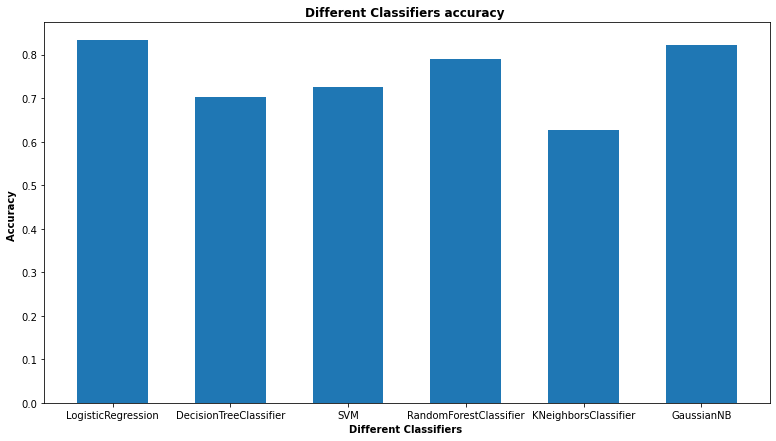

In [86]:
data=d.keys()
value=d.values()
import matplotlib
matplotlib.rcParams["figure.figsize"] = (13,7)
plt.bar(data,value,width=0.6)
plt.xlabel('Different Classifiers ',fontweight='bold')
plt.ylabel('Accuracy ',fontweight='bold')
plt.title('Different Classifiers accuracy ',fontweight='bold')
plt.show()

# Logistic Regression shows highest accuracy and it is broadly used in True/False condition which suits our problem set

In [41]:
def predict(x):
    return log_reg.predict([x])[0]

result=predict([1,1,1,1,2,4583,1508.0,1500.0,360.0,1.0,1])
if result==0:
    print('Your loan application is not Approved')
else:
    print('Your loan application is Approved')

Your loan application is not Approved


/Users/shivamsourav/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [28]:
train.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,2,0,1,2,5849,0.0,120.0,360.0,1.0,3,1
1,1,1,1,1,2,4583,1508.0,128.0,360.0,1.0,1,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,3,1


In [29]:
test.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1,0,1,2.0,5720,0,110.0,360.0,1.0,3


# using tkinter for GUI Based Output

In [94]:
from tkinter import *
root=Tk()
root.geometry('550x550')

gender,married,dependent,education,self,apin,coapin,loan,term,hist,area=None,None,None,None,None,None,None,None,None,None,None

array=[]
def OptionMenu_Select(event):
    global gender
    gender=a.get()
    if gender=='Male':
        gender=1
    else:
        gender=2
    
def aa(event):
    global married
    married=b.get()
    if married=='Yes':
        married=1
    else:
        married=2
    
def bb(event):
    global dependent
    dependent=c.get()
    if dependent=='1':
        dependent=1
    elif dependent=='2':
        dependent=2
    else:
        dependent=3
    
def cc(event):
    global education
    education=d.get()
    if education=='Graduate':
        education=1
    else:
        education=2
    
def dd(event):
    global self
    self=e.get()
    if self=='Yes':
        self=1
    else:
        self=2
    
def submit():
    global apin,coapin,loan,term
    apin=f.get()
    coapin=g.get()
    loan=h.get()
    term=i.get()
    
def jj(event):
    global hist
    hist=j.get()
    if hist=='Yes':
        hist=1
    else:
        hist=2

def kk(event):
    global area
    area=k.get()
    if area=='Urban':
        area=3
    elif area=='Semiurban':
        area=2
    else:
        area=1
        

        
a=StringVar()
b=StringVar()
c=StringVar()
d=StringVar()
e=StringVar()
f=IntVar()
g=IntVar()
h=IntVar()
i=IntVar()
j=StringVar()
k=StringVar()


arr=['Male','Female']
Label(root,text='Gender').grid(row=0,column=0,padx=10,pady=10)
OptionMenu(root, a, *(arr), command=OptionMenu_Select).grid(row=0,column=1,padx=10,pady=10)




arr=['Yes','No']
Label(root,text='Married').grid(row=1,column=0,padx=10,pady=10)
OptionMenu(root, b, *(arr), command=aa).grid(row=1,column=1,padx=10,pady=10)


arr=['1','2','3+']
Label(root,text='Dependent').grid(row=2,column=0,padx=10,pady=10)
OptionMenu(root, c, *(arr), command=bb).grid(row=2,column=1,padx=10,pady=10)


arr=['Graduate','Not Graduate']
Label(root,text='Education').grid(row=3,column=0,padx=10,pady=10)
OptionMenu(root, d, *(arr), command=cc).grid(row=3,column=1,padx=10,pady=10)



arr=['Yes','No']
Label(root,text='Self Employed').grid(row=4,column=0,padx=10,pady=10)
OptionMenu(root, e, *(arr), command=dd).grid(row=4,column=1,padx=10,pady=10)


Label(root,text='Applicant Income').grid(row=5,column=0,padx=10,pady=10)
Entry(root,textvariable=f).grid(row=5,column=1,padx=10,pady=10)


Label(root,text='Co-Applicant Income').grid(row=6,column=0,padx=10,pady=10)
Entry(root,textvariable=g).grid(row=6,column=1,padx=5,pady=5)


Label(root,text='Loan Amount').grid(row=7,column=0,padx=10,pady=10)
Entry(root,textvariable=h).grid(row=7,column=1,padx=10,pady=10)


Label(root,text='Loan Term ').grid(row=8,column=0,padx=10,pady=10)
Entry(root,textvariable=i).grid(row=8,column=1,padx=10,pady=10)



arr=['Yes','No']
Label(root,text='Credit History').grid(row=9,column=0,padx=10,pady=10)
OptionMenu(root, j, *(arr), command=jj).grid(row=9,column=1,padx=10,pady=10)


arr=['Rural','Urban','Semiurban']
Label(root,text='Property Area').grid(row=10,column=0,padx=10,pady=10)
OptionMenu(root, k, *(arr), command=kk).grid(row=10,column=1,padx=10,pady=10)

submit = Button(root, text="Submit", command=submit).grid(row=14,column=1,padx=10,pady=10)

root.mainloop()
arr=[gender,married,dependent,education,self,apin,coapin,loan,term,hist,area]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
y=train['Loan_Status']
X=train.drop('Loan_Status',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

lin_reg=LogisticRegression()
lin_reg.fit(X_train,y_train)
lin_reg.score(X_test,y_test)

def predict(x):
    return lin_reg.predict([x])[0]

result=predict(arr)

if result==0:
    result='Your Loan Application Is Not Approved'
else:
    result='Your Loan Application Is  Approved'
    
root=Tk()
Label(root,text=result).pack(padx=200, pady=200)
root.mainloop()

/Users/shivamsourav/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shivamsourav/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
